In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
train_data = pd.read_csv("Loan_Status_train.csv")
test_data = pd.read_csv("Loan_Status_test.csv")

In [4]:
train_data.drop(['Loan_ID'],axis=1,inplace=True)
test_data.drop(['Loan_ID'],axis=1,inplace=True)

In [5]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
test_data['Gender'].fillna(test_data['Gender'].mode()[0],inplace=True)
test_data['Married'].fillna(test_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)



C:\Users\VETRI\AppData\Local\Temp\ipykernel_14996\2985117520.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
C:\Users\VETRI\AppData\Local\Temp\ipykernel_14996\2985117520.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [6]:
from sklearn.preprocessing import LabelEncoder

model = LabelEncoder()
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for col in train_data:
  train_data[col]= model.fit_transform(train_data[col])
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0,81,8,1,2,1
1,1,1,1,0,0,306,60,81,8,1,0,0
2,1,1,0,0,1,139,0,26,8,1,2,1
3,1,1,0,1,0,90,160,73,8,1,2,1
4,1,0,0,0,0,381,0,94,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0,29,8,1,0,1
610,1,1,3,0,0,275,0,7,5,1,0,1
611,1,1,1,0,0,431,3,162,8,1,2,1
612,1,1,2,0,0,422,0,132,8,1,2,1


In [7]:
from sklearn.model_selection import train_test_split 
  
X = train_data.drop(['Loan_Status'],axis=1) 
y = train_data['Loan_Status'] 
X.shape,y.shape 

((614, 11), (614,))

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtree_reg = DecisionTreeRegressor(random_state=42) # Initialize a decision tree regressor
grid_search = GridSearchCV(estimator=dtree_reg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_dtree_reg = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred = best_dtree_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Test RMSE: {rmse}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Test RMSE: 0.45992992801283605


In [10]:
def dtree_cv(max_depth, min_samples_split, min_samples_leaf):
    # Define the model with the parameters to be optimized
    estimator = DecisionTreeRegressor(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=2
    )
    cval = cross_val_score(estimator, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return cval.mean() # The optimizer tries to maximize the function, so we negate the score to minimize it

# Define the parameter bounds
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

optimizer = BayesianOptimization(
    f=dtree_cv,
    pbounds=param_bounds,
    random_state=1,
)

optimizer.maximize(n_iter=25, init_points=5) # Bayesian optimization
best_params_bayes = optimizer.max['params']
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])
best_score_bayes = optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_bayes}")
print(f"Best Score (Bayesian Optimization): {best_score_bayes}")

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -0.1705   | 8.923     | 14.69     | 2.002     |
| 2         | -0.1793   | 6.744     | 3.788     | 3.662     |
| 3         | -0.1626   | 4.539     | 7.566     | 9.142     |
| 4         | -0.185    | 11.24     | 8.965     | 14.33     |
| 5         | -0.1621   | 4.885     | 17.68     | 2.493     |
| 6         | -0.1672   | 5.112     | 15.77     | 2.565     |
| 7         | -0.1556   | 3.35      | 20.0      | 4.489     |
| 8         | -0.1497   | 1.0       | 19.98     | 9.37      |
| 9         | -0.1497   | 1.0       | 20.0      | 16.15     |
| 10        | -0.1497   | 1.0       | 13.53     | 14.15     |
| 11        | -0.1497   | 1.0       | 1.0       | 20.0      |
| 12        | -0.1497   | 1.0       | 8.847     | 20.0      |
| 13        | -0.1497   | 1.0       | 1.0       | 13.2      |
| 14        | -0.1605   | 20.0      | 20.0      | 2.0       |
| 15    

DecisionTreeClassifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) 

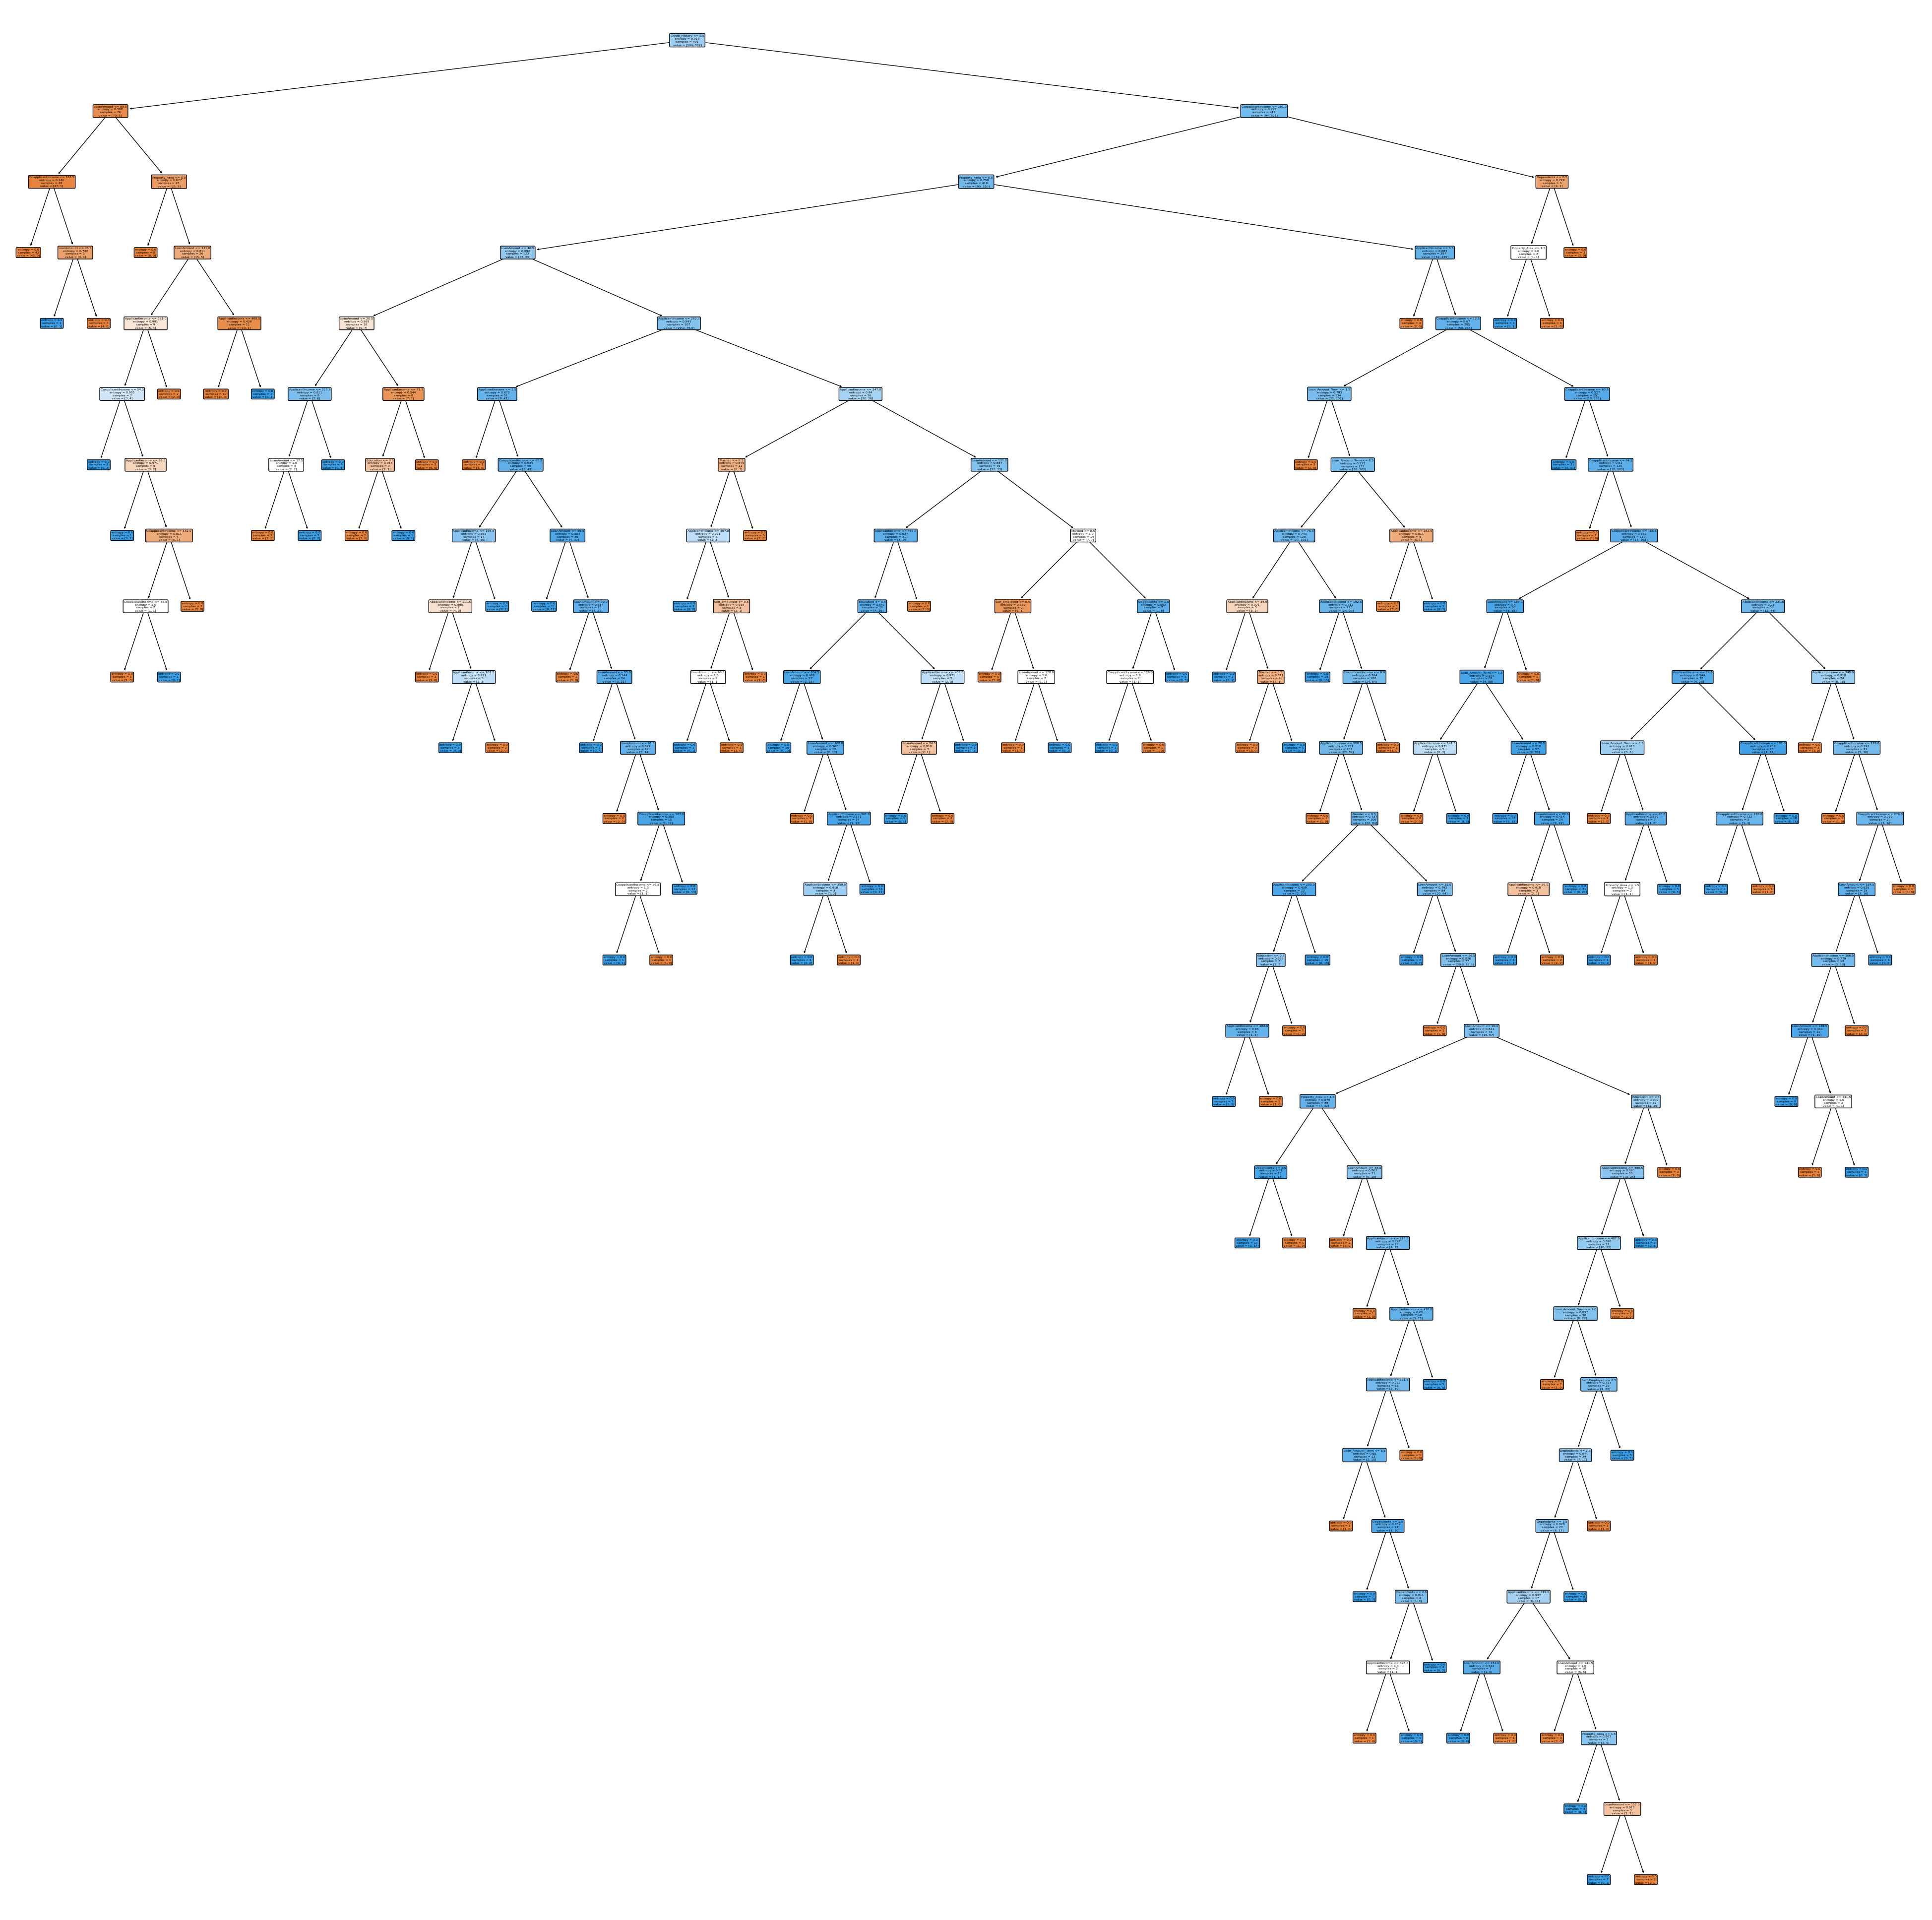

In [13]:
model = DecisionTreeClassifier(criterion="entropy")    #entropy- identifying attributes
model.fit(x_train, y_train)

plt.figure(figsize=(50,50))
tree.plot_tree(model, feature_names=list(X.columns), filled=True, rounded=True)
plt.show()

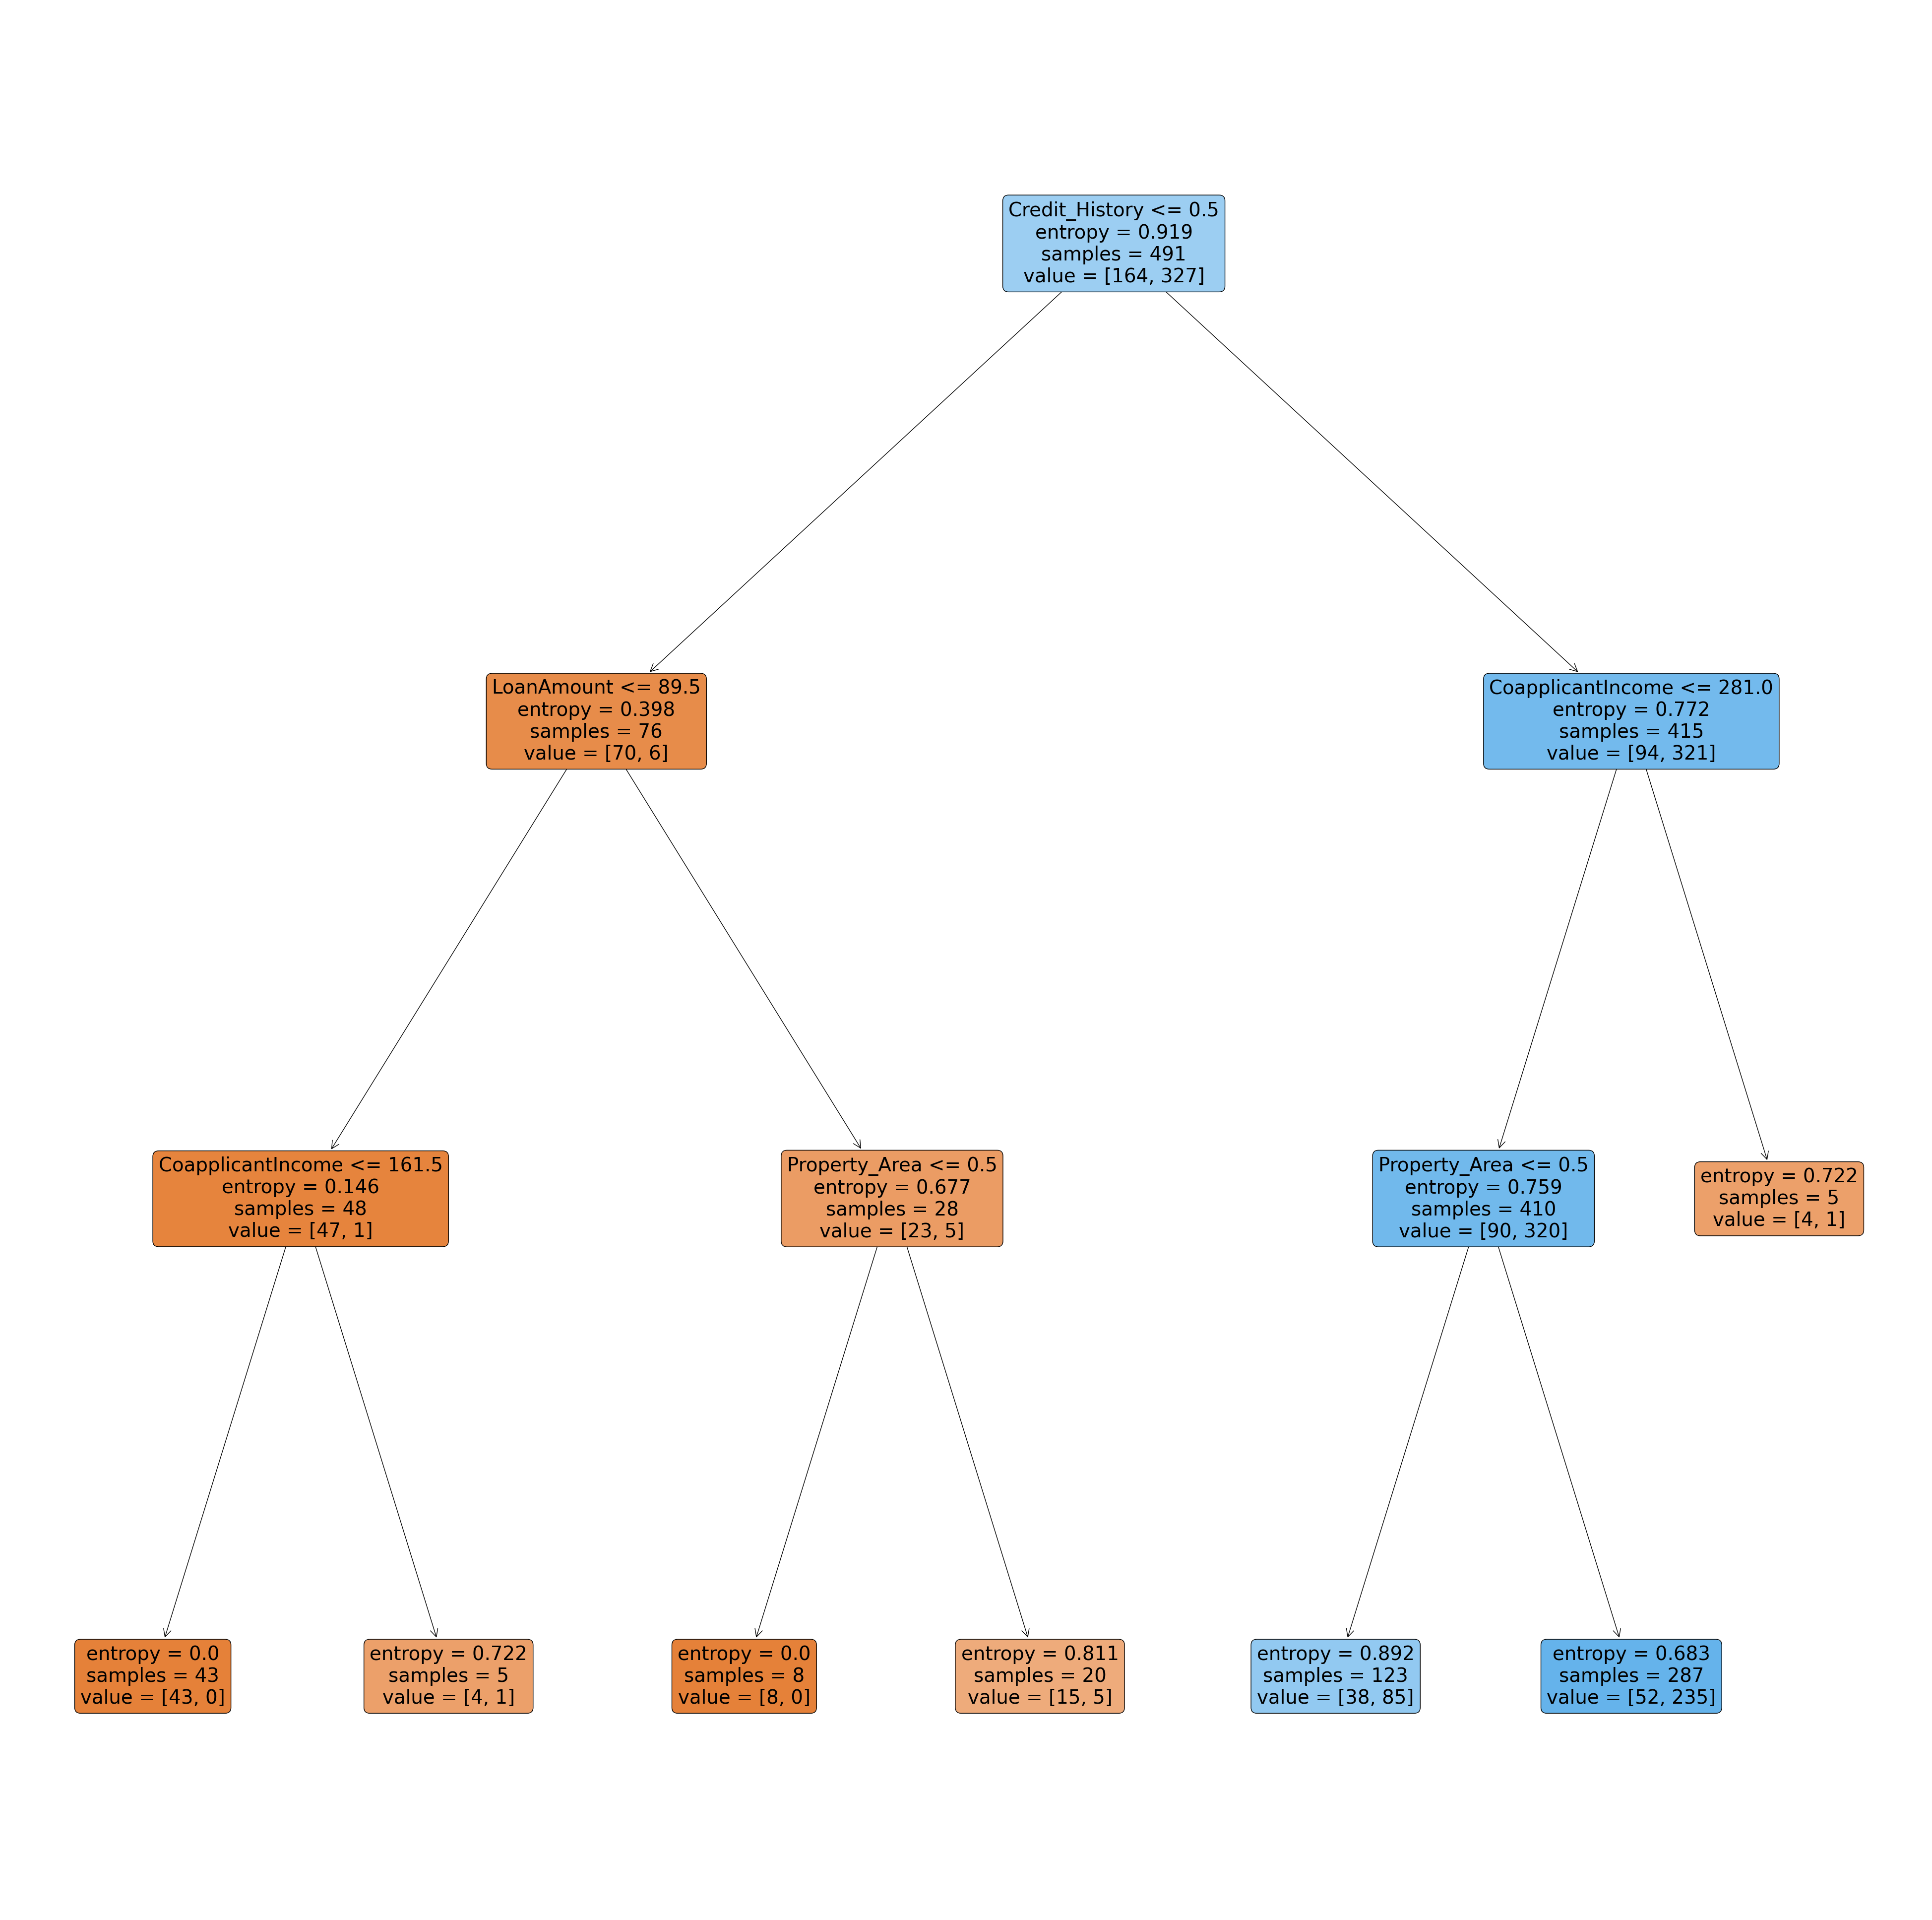

In [14]:
model = DecisionTreeClassifier(criterion="entropy", max_depth= 3, min_samples_leaf=4, min_samples_split= 10)    #object creation
model.fit(x_train, y_train)

plt.figure(figsize=(50,50))
tree.plot_tree(model, feature_names=list(X.columns), filled=True, rounded=True)
plt.show()

In [15]:
param_grids = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }



dt = DecisionTreeClassifier(random_state=1024)
model1 = GridSearchCV(estimator=dt, param_grid=param_grid)
model1.fit(x_train,y_train)


model1.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': 1024,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(random_state=1024),
 'n_jobs': None,
 'param_grid': {'max_depth': [10, 20, 30, None],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [16]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

In [17]:
model = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=1024)
model.fit(x_train, y_train)

Result3 = []
pred5 = model.predict(x_train)
pred_test5 = model.predict(x_test)
Accuracy_Training = accuracy_score(y_train, pred5)*100
Precision_Training= precision_score(y_train, pred5)*100
Recall_Training= recall_score(y_train, pred5)*100
F1_Score_training= f1_score(y_train, pred5)
a = [Accuracy_Training, Precision_Training, Recall_Training, F1_Score_training]
df3 = pd.DataFrame(a, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"], columns=["Training Result_DT3"])

Accuracy_Test = accuracy_score(y_test, pred_test5)*100
Precision_Test= precision_score(y_test, pred_test5)*100
Recall_Test= recall_score(y_test, pred_test5)*100
F1_Score_Test= f1_score(y_test, pred_test5)
b = [Accuracy_Test, Precision_Test, Recall_Test, F1_Score_Test]
df4 = pd.DataFrame(b, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"],  columns=["Test Result_DT3"])
Result3 = df3.join(df4)

Result3


,Training Result_DT3,Test Result_DT3
Accuracy Score,85.539715,76.422764
Precision Score,88.787879,88.372093
Recall Score,89.602446,80.000000
F1 Score,0.891933,0.839779


In [18]:
from sklearn.decomposition import PCA

In [19]:
model = DecisionTreeClassifier(criterion="entropy", max_depth= 1, min_samples_leaf= 13, min_samples_split= 7)
model.fit(x_train, y_train)
Result1 = []
pred4 = model.predict(x_train)
pred_test4 = model.predict(x_test)
Accuracy_Training = accuracy_score(y_train, pred4)*100
Precision_Training= precision_score(y_train, pred4)*100
Recall_Training= recall_score(y_train, pred4)*100
F1_Score_training= f1_score(y_train, pred4)
a = [Accuracy_Training, Precision_Training, Recall_Training, F1_Score_training]
df = pd.DataFrame(a, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"], columns=["Training Result_DT1"])
df

Accuracy_Test = accuracy_score(y_test, pred_test4)*100
Precision_Test= precision_score(y_test, pred_test4)*100
Recall_Test= recall_score(y_test, pred_test4)*100
F1_Score_Test= f1_score(y_test, pred_test4)
b = [Accuracy_Test, Precision_Test, Recall_Test, F1_Score_Test]
df2 = pd.DataFrame(b, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"],  columns=["Test Result_DT1"])
Result1 = df.join(df2)

Result1

,Training Result_DT1,Test Result_DT1
Accuracy Score,79.633401,86.178862
Precision Score,77.349398,85.454545
Recall Score,98.165138,98.947368
F1 Score,0.865229,0.917073


In [20]:
model = DecisionTreeClassifier(criterion="gini", max_depth= 3, min_samples_leaf=15, min_samples_split= 20)
model.fit(x_train, y_train)
Result2 = []
pred5 = model.predict(x_train)
pred_test5 = model.predict(x_test)
Accuracy_Training = accuracy_score(y_train, pred5)*100
Precision_Training= precision_score(y_train, pred5)*100
Recall_Training= recall_score(y_train, pred5)*100
F1_Score_training= f1_score(y_train, pred5)
a = [Accuracy_Training, Precision_Training, Recall_Training, F1_Score_training]
df3 = pd.DataFrame(a, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"], columns=["Training Result_DT"])

Accuracy_Test = accuracy_score(y_test, pred_test5)*100
Precision_Test= precision_score(y_test, pred_test5)*100
Recall_Test= recall_score(y_test, pred_test5)*100
F1_Score_Test= f1_score(y_test, pred_test5)
b = [Accuracy_Test, Precision_Test, Recall_Test, F1_Score_Test]
df4 = pd.DataFrame(b, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"],  columns=["Test Result_DT"])
Result2 = df3.join(df4)

Result2

,Training Result_DT,Test Result_DT
Accuracy Score,80.040733,85.365854
Precision Score,78.696742,85.321101
Recall Score,96.024465,97.894737
F1 Score,0.865014,0.911765


In [21]:
Final_Result = Result1.join(Result2)
Final_Result

,Training Result_DT1,Test Result_DT1,Training Result_DT,Test Result_DT
Accuracy Score,79.633401,86.178862,80.040733,85.365854
Precision Score,77.349398,85.454545,78.696742,85.321101
Recall Score,98.165138,98.947368,96.024465,97.894737
F1 Score,0.865229,0.917073,0.865014,0.911765


RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier


In [23]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the classifier
rf_classifier.fit(x_train, y_train)
# Make predictions on the test set

Result3 = []
pred6 = rf_classifier.predict(x_train)
pred_test6 = model.predict(x_test)
Accuracy_Training = accuracy_score(y_train, pred6)*100
Precision_Training= precision_score(y_train, pred6)*100
Recall_Training= recall_score(y_train, pred6)*100
F1_Score_training= f1_score(y_train, pred6)
a = [Accuracy_Training, Precision_Training, Recall_Training, F1_Score_training]
df5 = pd.DataFrame(a, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"], columns=["Training Result_RF1"])

Accuracy_Test = accuracy_score(y_test, pred_test6)*100
Precision_Test= precision_score(y_test, pred_test6)*100
Recall_Test= recall_score(y_test, pred_test6)*100
F1_Score_Test= f1_score(y_test, pred_test6)
b = [Accuracy_Test, Precision_Test, Recall_Test, F1_Score_Test]
df6 = pd.DataFrame(b, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"],  columns=["Test Result_RF1"])
Result3 = df5.join(df6)

Result3


,Training Result_RF1,Test Result_RF1
Accuracy Score,100.0,85.365854
Precision Score,100.0,85.321101
Recall Score,100.0,97.894737
F1 Score,1.0,0.911765


In [24]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=20)

# Train the classifier
rf_classifier.fit(x_train, y_train)
# Make predictions on the test set

Result4 = []
pred6 = rf_classifier.predict(x_train)
pred_test6 = model.predict(x_test)
Accuracy_Training = accuracy_score(y_train, pred6)*100
Precision_Training= precision_score(y_train, pred6)*100
Recall_Training= recall_score(y_train, pred6)*100
F1_Score_training= f1_score(y_train, pred6)
a = [Accuracy_Training, Precision_Training, Recall_Training, F1_Score_training]
df5 = pd.DataFrame(a, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"], columns=["Training Result_RF"])

Accuracy_Test = accuracy_score(y_test, pred_test6)*100
Precision_Test= precision_score(y_test, pred_test6)*100
Recall_Test= recall_score(y_test, pred_test6)*100
F1_Score_Test= f1_score(y_test, pred_test6)
b = [Accuracy_Test, Precision_Test, Recall_Test, F1_Score_Test]
df6 = pd.DataFrame(b, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"],  columns=["Test Result_RF"])
Result4 = df5.join(df6)

Result4

,Training Result_RF,Test Result_RF
Accuracy Score,100.0,85.365854
Precision Score,100.0,85.321101
Recall Score,100.0,97.894737
F1 Score,1.0,0.911765


In [25]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=250, random_state=1050)

# Train the classifier
rf_classifier.fit(x_train, y_train)
# Make predictions on the test set

Result5 = []
pred6 = rf_classifier.predict(x_train)
pred_test6 = model.predict(x_test)
Accuracy_Training = accuracy_score(y_train, pred6)*100
Precision_Training= precision_score(y_train, pred6)*100
Recall_Training= recall_score(y_train, pred6)*100
F1_Score_training= f1_score(y_train, pred6)
a = [Accuracy_Training, Precision_Training, Recall_Training, F1_Score_training]
df5 = pd.DataFrame(a, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"], columns=["Training Result_RF1"])

Accuracy_Test = accuracy_score(y_test, pred_test6)*100
Precision_Test= precision_score(y_test, pred_test6)*100
Recall_Test= recall_score(y_test, pred_test6)*100
F1_Score_Test= f1_score(y_test, pred_test6)
b = [Accuracy_Test, Precision_Test, Recall_Test, F1_Score_Test]
df6 = pd.DataFrame(b, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"],  columns=["Test Result_RF1"])
Result5= df5.join(df6)

Result5

,Training Result_RF1,Test Result_RF1
Accuracy Score,100.0,85.365854
Precision Score,100.0,85.321101
Recall Score,100.0,97.894737
F1 Score,1.0,0.911765


In [26]:
rfc = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 2, max_depth = 4,     #criterion{“gini”, “entropy”, “log_loss”}, default=”gini” Log_loss giving best score
                             criterion = 'log_loss', 
                             random_state =42)

# Train the classifier
rfc.fit(x_train, y_train)
# Make predictions on the test set

Result7 = []
pred6 = rfc.predict(x_train)
pred_test6 = model.predict(x_test)
Accuracy_Training = accuracy_score(y_train, pred6)*100
Precision_Training= precision_score(y_train, pred6)*100
Recall_Training= recall_score(y_train, pred6)*100
F1_Score_training= f1_score(y_train, pred6)
a = [Accuracy_Training, Precision_Training, Recall_Training, F1_Score_training]
df5 = pd.DataFrame(a, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"], columns=["Training Result_RF1"])

Accuracy_Test = accuracy_score(y_test, pred_test6)*100
Precision_Test= precision_score(y_test, pred_test6)*100
Recall_Test= recall_score(y_test, pred_test6)*100
F1_Score_Test= f1_score(y_test, pred_test6)
b = [Accuracy_Test, Precision_Test, Recall_Test, F1_Score_Test]
df6 = pd.DataFrame(b, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"],  columns=["Test Result_RF1"])
Result7= df5.join(df6)

Result7

,Training Result_RF1,Test Result_RF1
Accuracy Score,80.448065,85.365854
Precision Score,77.966102,85.321101
Recall Score,98.470948,97.894737
F1 Score,0.870270,0.911765


In [27]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=250, random_state=5)

# Train the classifier
rf_classifier.fit(x_train, y_train)
# Make predictions on the test set

Result5 = []
pred6 = rf_classifier.predict(x_train)
pred_test6 = model.predict(x_test)
Accuracy_Training = accuracy_score(y_train, pred6)*100
Precision_Training= precision_score(y_train, pred6)*100
Recall_Training= recall_score(y_train, pred6)*100
F1_Score_training= f1_score(y_train, pred6)
a = [Accuracy_Training, Precision_Training, Recall_Training, F1_Score_training]
df5 = pd.DataFrame(a, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"], columns=["Training Result_RF1"])

Accuracy_Test = accuracy_score(y_test, pred_test6)*100
Precision_Test= precision_score(y_test, pred_test6)*100
Recall_Test= recall_score(y_test, pred_test6)*100
F1_Score_Test= f1_score(y_test, pred_test6)
b = [Accuracy_Test, Precision_Test, Recall_Test, F1_Score_Test]
df6 = pd.DataFrame(b, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"],  columns=["Test Result_RF1"])
Result5= df5.join(df6)

Result5

,Training Result_RF1,Test Result_RF1
Accuracy Score,100.0,85.365854
Precision Score,100.0,85.321101
Recall Score,100.0,97.894737
F1 Score,1.0,0.911765


Gradient Boosting
Gradient Boosting is a powerful boosting algorithm that combines several weak learners into strong learners, 
in which each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent.

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
# Instantiate Gradient Boosting classifier
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=150,
                                 max_features=5 )
# Fit to training set
gbc.fit(x_train, y_train)

Result6 = []
pred7 = gbc.predict(x_train)
pred_test7 = model.predict(x_test)
Accuracy_Training = accuracy_score(y_train, pred7)*100
Precision_Training= precision_score(y_train, pred7)*100
Recall_Training= recall_score(y_train, pred7)*100
F1_Score_training= f1_score(y_train, pred7)
a = [Accuracy_Training, Precision_Training, Recall_Training, F1_Score_training]
df7 = pd.DataFrame(a, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"], columns=["Training Result_gb1"])

Accuracy_Test = accuracy_score(y_test, pred_test7)*100
Precision_Test= precision_score(y_test, pred_test7)*100
Recall_Test= recall_score(y_test, pred_test7)*100
F1_Score_Test= f1_score(y_test, pred_test7)
b = [Accuracy_Test, Precision_Test, Recall_Test, F1_Score_Test]
df8 = pd.DataFrame(b, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"],  columns=["Test Result_gb1"])
Result6= df7.join(df8)

Result6

,Training Result_gb1,Test Result_gb1
Accuracy Score,90.631365,85.365854
Precision Score,88.075881,85.321101
Recall Score,99.388379,97.894737
F1 Score,0.933908,0.911765


In [30]:
# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=50,
                                 learning_rate=0.5,
                                 random_state=500,
                                 max_features=2)
# Fit to training set
gbc.fit(x_train, y_train)

Result7 = []
pred7 = gbc.predict(x_train)
pred_test7 = model.predict(x_test)
Accuracy_Training = accuracy_score(y_train, pred7)*100
Precision_Training= precision_score(y_train, pred7)*100
Recall_Training= recall_score(y_train, pred7)*100
F1_Score_training= f1_score(y_train, pred7)
a = [Accuracy_Training, Precision_Training, Recall_Training, F1_Score_training]
df7 = pd.DataFrame(a, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"], columns=["Training Result_GB"])

Accuracy_Test = accuracy_score(y_test, pred_test7)*100
Precision_Test= precision_score(y_test, pred_test7)*100
Recall_Test= recall_score(y_test, pred_test7)*100
F1_Score_Test= f1_score(y_test, pred_test7)
b = [Accuracy_Test, Precision_Test, Recall_Test, F1_Score_Test]
df8 = pd.DataFrame(b, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"],  columns=["Test Result_GB"])
Result7= df7.join(df8)

Result7

,Training Result_GB,Test Result_GB
Accuracy Score,93.686354,85.365854
Precision Score,91.807910,85.321101
Recall Score,99.388379,97.894737
F1 Score,0.954479,0.911765


LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression
import numpy as np

lc = LogisticRegression()
lc.fit(x_train, y_train)

Result8 = []
pred8 =lc.predict(x_train)
pred_test8 = model.predict(x_test)
Accuracy_Training = accuracy_score(y_train, pred8)*100
Precision_Training= precision_score(y_train, pred8)*100
Recall_Training= recall_score(y_train, pred8)*100
F1_Score_training= f1_score(y_train, pred8)
a = [Accuracy_Training, Precision_Training, Recall_Training, F1_Score_training]
df8 = pd.DataFrame(a, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"], columns=["Training Result_LR"])

Accuracy_Test = accuracy_score(y_test, pred_test8)*100
Precision_Test= precision_score(y_test, pred_test8)*100
Recall_Test= recall_score(y_test, pred_test8)*100
F1_Score_Test= f1_score(y_test, pred_test8)
b = [Accuracy_Test, Precision_Test, Recall_Test, F1_Score_Test]
df9 = pd.DataFrame(b, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"],  columns=["Test Result_LR"])
Result8= df8.join(df9)

Result8


c:\Users\VETRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Training Result_LR,Test Result_LR
Accuracy Score,79.633401,85.365854
Precision Score,77.349398,85.321101
Recall Score,98.165138,97.894737
F1 Score,0.865229,0.911765


In [32]:
lc = LogisticRegression()
lc.fit(x_train, y_train)

param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000]
}
]

clf = GridSearchCV(lc,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)
clf

c:\Users\VETRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [33]:
best_clf = clf.fit(x_train,y_train)
best_clf.best_estimator_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


c:\Users\VETRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3120 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\VETRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\VETRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\VETRI\A

LogisticRegression(C=0.615848211066026, solver='liblinear')

In [34]:
print(f'Accuracy - : {best_clf.score(x_train,y_train):.3f}')
print(f'Accuracy - : {best_clf.score(x_test,y_test):.3f}')

Accuracy - : 0.796
Accuracy - : 0.862


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

After appling StandardScaler and PCA (Principle component analysis) Dimention reduction

In [36]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=4)),
    ('logistic', LogisticRegression())
])


pipeline.fit(x_train, y_train)

Result8 = []
pred8 = pipeline.predict(x_train)
pred_test8 = pipeline.predict(x_test)
Accuracy_Training = accuracy_score(y_train, pred8)*100
Precision_Training= precision_score(y_train, pred8)*100
Recall_Training= recall_score(y_train, pred8)*100
F1_Score_training= f1_score(y_train, pred8)
a = [Accuracy_Training, Precision_Training, Recall_Training, F1_Score_training]
df8 = pd.DataFrame(a, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"], columns=["Training Result_LR1"])

Accuracy_Test = accuracy_score(y_test, pred_test8)*100
Precision_Test= precision_score(y_test, pred_test8)*100
Recall_Test= recall_score(y_test, pred_test8)*100
F1_Score_Test= f1_score(y_test, pred_test8)
b = [Accuracy_Test, Precision_Test, Recall_Test, F1_Score_Test]
df9 = pd.DataFrame(b, index= ["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"],  columns=["Test Result_LR2"])
Result8= df8.join(df9)

Result8

,Training Result_LR1,Test Result_LR2
Accuracy Score,72.097760,72.357724
Precision Score,73.170732,79.047619
Recall Score,91.743119,87.368421
F1 Score,0.814111,0.830000
